* Code written by Garrett Swan 01/23/2021. Feel free to use!



Goal = webscrap boxscores from basketball_reference.com and do some fun stuff:

1) I want to track the current 2020/2021 season

2) I want to see which teams under and over perform based on their point per games

The code first webscraps. The fun stuff can be found below

# Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

sns.set_context('paper')

# Web scraping

Code below web scraps from 2016 to 2019. The tables in basketball_reference changes a little bit between certain years, so some of this code is different for each batch

In [ ]:
years = ['2016','2017','2018','2019']

total_data = []
temp_data = []
playoff = []
count = 0
for year in years:
  url = 'https://www.basketball-reference.com/leagues/NBA_'+year+'.html'
  data = pd.read_html(url)

  # they come out as separate dataframes in a list
  eastern = data[0]
  western = data[1]

  eastern = eastern.rename(columns={eastern.columns[0]: 'Team'})
  western = western.rename(columns={western.columns[0]: 'Team'})

  # recoding whether this is a playoff team or not

  for da_index in eastern['Team'].index:
    if eastern['Team'][da_index][-1] is '*':
      playoff.append(1)
    else:
      playoff.append(0)

  for da_index in western['Team'].index:
    if western['Team'][da_index][-1] is '*':
      playoff.append(1)
    else:
      playoff.append(0)

  # each time through the for loop, we add the dataframes to a master dataframe
  if count == 0:
    total_data = pd.concat([eastern,western],axis=0)
    total_data.insert(len(total_data.columns),'Year',np.tile(np.array(float(year)),len(total_data.index)))
    count = 1
  elif count == 1:
    temp_data = pd.concat([eastern,western],axis=0)
    temp_data.insert(len(temp_data.columns),'Year',np.tile(np.array(float(year)),len(temp_data.index)))

    total_data = pd.concat([total_data,temp_data],axis=0)

In [ ]:
total_data.insert(len(total_data.columns),'Playoff',playoff)

In [ ]:
years2 = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

temp_data =[]
count = 0
for year in years2:
  url = 'https://www.basketball-reference.com/leagues/NBA_'+year+'.html'
  data = pd.read_html(url)

  eastern = data[0]
  western = data[1]

  eplayoff = []
  wplayoff = []

  eastern = eastern.rename(columns={eastern.columns[0]: 'Team'})

  # getting rid of some rows

  drop_rows = []
  for index,row in eastern.iterrows():
    try:
      float(row['W'])+1
    except:
      drop_rows.append(index)

  eastern = eastern.drop(index=drop_rows)

  for da_index in eastern['Team'].index:
    if eastern['Team'][da_index][-1] is '*':
      eplayoff.append(1)
    else:
      eplayoff.append(0)

  # something gets weird, so we actually need to convert these to numeric

  eastern['W'] = pd.to_numeric(eastern['W'])
  eastern['L'] = pd.to_numeric(eastern['L'])
  eastern['W/L%'] = pd.to_numeric(eastern['W/L%'])
  eastern['PS/G'] = pd.to_numeric(eastern['PS/G'])
  eastern['PA/G'] = pd.to_numeric(eastern['PA/G'])
  eastern['SRS'] = pd.to_numeric(eastern['SRS'])
  eastern['Playoff'] = pd.to_numeric(eplayoff)

  western = western.rename(columns={western.columns[0]: 'Team'})

  drop_rows = []
  for index,row in western.iterrows():
    try:
      float(row['W'])+1
    except:
      drop_rows.append(index)

  western = western.drop(index=drop_rows)

  for da_index in western['Team'].index:
    if western['Team'][da_index][-1] is '*':
      wplayoff.append(1)
    else:
      wplayoff.append(0)

  western['W'] = pd.to_numeric(western['W'])
  western['L'] = pd.to_numeric(western['L'])
  western['W/L%'] = pd.to_numeric(western['W/L%'])
  western['PS/G'] = pd.to_numeric(western['PS/G'])
  western['PA/G'] = pd.to_numeric(western['PA/G'])
  western['SRS'] = pd.to_numeric(western['SRS'])
  western['Playoff'] = pd.to_numeric(wplayoff)

  # now we can concat with the previous master dataframe

  temp_data = pd.concat([eastern,western],axis=0)
  temp_data.insert(len(temp_data.columns),'Year',np.tile(np.array(float(year)),len(temp_data.index)))

  total_data = pd.concat([total_data,temp_data],axis=0)

In [ ]:
# this block is basically the same as the above block. Not sure why I split it that way

years3 = ['1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004']

temp_data =[]
count = 0
for year in years3:
  url = 'https://www.basketball-reference.com/leagues/NBA_'+year+'.html'
  data = pd.read_html(url)

  eastern = data[0]
  western = data[1]

  eplayoff = []
  wplayoff = []

  eastern = eastern.rename(columns={eastern.columns[0]: 'Team'})

  drop_rows_e = []
  for index,row in eastern.iterrows():
    try:
      float(row['W'])+1
    except:
      drop_rows_e.append(index)

  eastern = eastern.drop(index=drop_rows_e)

  for da_index in eastern['Team'].index:
    if eastern['Team'][da_index][-1] is '*':
      eplayoff.append(1)
    else:
      eplayoff.append(0)

  eastern['W'] = pd.to_numeric(eastern['W'])
  eastern['L'] = pd.to_numeric(eastern['L'])
  eastern['W/L%'] = pd.to_numeric(eastern['W/L%'])
  eastern['PS/G'] = pd.to_numeric(eastern['PS/G'])
  eastern['PA/G'] = pd.to_numeric(eastern['PA/G'])
  eastern['SRS'] = pd.to_numeric(eastern['SRS'])
  eastern['Playoff'] = pd.to_numeric(eplayoff)

  western = western.rename(columns={western.columns[0]: 'Team'})

  drop_rows_w = []
  for index,row in western.iterrows():
    try:
      float(row['W'])+1
    except:
      drop_rows_w.append(index)

  western = western.drop(index=drop_rows_w)

  for da_index in western['Team'].index:
    if western['Team'][da_index][-1] is '*':
      wplayoff.append(1)
    else:
      wplayoff.append(0)

  western['W'] = pd.to_numeric(western['W'])
  western['L'] = pd.to_numeric(western['L'])
  western['W/L%'] = pd.to_numeric(western['W/L%'])
  western['PS/G'] = pd.to_numeric(western['PS/G'])
  western['PA/G'] = pd.to_numeric(western['PA/G'])
  western['SRS'] = pd.to_numeric(western['SRS'])
  western['Playoff'] = pd.to_numeric(wplayoff)
  
  temp_data = pd.concat([eastern,western],axis=0)
  temp_data.insert(len(temp_data.columns),'Year',np.tile(np.array(float(year)),len(temp_data.index)))

  total_data = pd.concat([total_data,temp_data],axis=0)

Awesome! Tons of data.

Now, let's add a Diff column which is the points score minus points allowed per game.

In [ ]:
total_data.insert(len(total_data.columns),'Diff',total_data['PS/G']-total_data['PA/G'])

Looks good

In [ ]:
total_data.tail()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Playoff,Diff
11,Portland Trail Blazers,41,41,0.500,15.0,90.7,92.0,-0.58,2004.0,0,-1.3
12,Golden State Warriors,37,45,0.451,19.0,93.3,94.0,-0.07,2004.0,0,-0.7
13,Seattle SuperSonics,37,45,0.451,19.0,97.1,97.8,0.02,2004.0,0,-0.7
14,Phoenix Suns,29,53,0.354,27.0,94.2,97.9,-2.94,2004.0,0,-3.7
15,Los Angeles Clippers,28,54,0.341,28.0,94.8,99.4,-3.74,2004.0,0,-4.6


In [ ]:
total_data.shape

(1257, 11)

Saving as an excel so I don't have to web scrap everytime

In [ ]:
total_data.to_excel('total_data_NBA_playing_around_1972to2019.xlsx')

# Playing with data

Loading data. Also loading this excel file that includes the scores of the 2020/2021 season

In [ ]:
total_data = pd.read_excel('total_data_NBA_playing_around_1972to2019_2.xlsx',index_col=0)
nba_scores = pd.read_excel('nba_scores_0114.xlsx',index_col=0)

In [ ]:
total_data.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Playoff,Diff,Champions
0,Cleveland Cavaliers*,57,25,0.695,—,104.3,98.3,5.45,2016,1,6.0,1
1,Toronto Raptors*,56,26,0.683,1.0,102.7,98.2,4.08,2016,1,4.5,0
2,Miami Heat*,48,34,0.585,9.0,100.0,98.4,1.50,2016,1,1.6,0
3,Atlanta Hawks*,48,34,0.585,9.0,102.8,99.2,3.49,2016,1,3.6,0
4,Boston Celtics*,48,34,0.585,9.0,105.7,102.5,2.84,2016,1,3.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11,Portland Trail Blazers,41,41,0.500,15.0,90.7,92.0,-0.58,2004,0,-1.3,0
12,Golden State Warriors,37,45,0.451,19.0,93.3,94.0,-0.07,2004,0,-0.7,0
13,Seattle SuperSonics,37,45,0.451,19.0,97.1,97.8,0.02,2004,0,-0.7,0
14,Phoenix Suns,29,53,0.354,27.0,94.2,97.9,-2.94,2004,0,-3.7,0


In [ ]:
nba_scores.head()

,Atlanta_Hawks_Score,Atlanta_Hawks_Opp_Score,Boston_Celtics_Score,Boston_Celtics_Opp_Score,Brookyln_Nets_Score,Brookyln_Nets_Opp_Score,Charlotte_Hornets_Score,Charlotte_Hornets_Opp_Score,Chicago_Bulls_Score,Chicago_Bulls_Opp_Score,Cleveland_Cavaliers_Score,Cleveland_Cavaliers_Opp_Score,Dallas_Mavericks_Score,Dallas_Mavericks_Opp_Score,Denver_Nuggets_Score,Denver_Nuggets_Opp_Score,Detroit_Pistons_Score,Detroit_Pistons_Opp_Score,Golden_State_Warriors_Score,Golden_State_Warriors_Opp_Score,Houston_Rockets_Score,Houston_Rockets_Opp_Score,Indiana_Pacers_Score,Indiana_Pacers_Opp_Score,Los_Angeles_Clippers_Score,Los_Angeles_Clippers_Opp_Score,Los_Angeles_Lakers_Score,Los_Angeles_Lakers_Opp_Score,Memphis_Grizzles_Score,Memphis_Grizzles_Opp_Score,Miami_Heat_Score,Miami_Heat_Opp_Score,Milwaukee_Bucks_Score,Milwaukee_Bucks_Opp_Score,Minnesota_Timberwolves_Score,Minnesota_Timberwolves_Opp_Score,New_Orleans_Pelicans_Score,New_Orleans_Pelicans_Opp_Score,New_York_Knicks_Score,New_York_Knicks_Opp_Score,Oklahoma_City_Thunder_Score,Oklahoma_City_Thunder_Opp_Score,Orlando_Magic_Score,Orlando_Magic_Opp_Score,Philadelphia_76ers_Score,Philadelphia_76ers_Opp_Score,Phoenix_Suns_Score,Phoenix_Suns_Opp_Score,Portland_Trial_Blazers_Score,Portland_Trial_Blazers_Opp_Score,Sacramento_Kings_Score,Sacramento_Kings_Opp_Score,San_Antonio_Spurs_Score,San_Antonio_Spurs_Opp_Score,Toronto_Raptors_Score,Toronto_Raptors_Opp_Score,Utah_Jazz_Score,Utah_Jazz_Opp_Score,Washington_Wizards_Score,Washington_Wizards_Opp_Score
1,124.0,104.0,122.0,121.0,125.0,99.0,114.0,121.0,104.0,124.0,121.0,114.0,102.0,106.0,122.0,124.0,101.0,111.0,99.0,125.0,126.0,128.0,121.0,107.0,116.0,109.0,109.0,116.0,119.0,131.0,107.0,113.0,121.0,122.0,111.0,101.0,113.0,99.0,107.0,121.0,109.0,107.0,113.0,108.0,113.0,107.0,106.0,102.0,100.0,120.0,124.0,122.0,131.0,119.0,99.0,113.0,120.0,100.0,107.0,113.0
2,122.0,112.0,95.0,123.0,123.0,95.0,107.0,109.0,106.0,125.0,128.0,119.0,115.0,138.0,108.0,121.0,119.0,128.0,99.0,138.0,111.0,124.0,125.0,106.0,121.0,108.0,138.0,115.0,112.0,122.0,111.0,98.0,138.0,99.0,116.0,111.0,98.0,111.0,89.0,109.0,109.0,110.0,130.0,120.0,109.0,89.0,103.0,106.0,128.0,126.0,106.0,103.0,119.0,114.0,114.0,119.0,111.0,116.0,120.0,130.0
3,128.0,120.0,107.0,108.0,104.0,106.0,106.0,104.0,128.0,129.0,118.0,94.0,124.0,73.0,124.0,111.0,120.0,128.0,129.0,128.0,122.0,119.0,108.0,107.0,73.0,124.0,127.0,91.0,116.0,111.0,97.0,144.0,110.0,130.0,91.0,127.0,98.0,95.0,130.0,110.0,107.0,118.0,120.0,113.0,94.0,118.0,116.0,100.0,115.0,107.0,100.0,116.0,95.0,98.0,93.0,100.0,110.0,109.0,113.0,120.0
4,141.0,145.0,116.0,111.0,111.0,116.0,118.0,99.0,115.0,107.0,86.0,95.0,99.0,118.0,115.0,125.0,106.0,116.0,116.0,106.0,102.0,94.0,111.0,116.0,124.0,101.0,107.0,115.0,107.0,126.0,119.0,108.0,144.0,97.0,101.0,124.0,86.0,111.0,95.0,86.0,80.0,113.0,118.0,107.0,100.0,93.0,111.0,86.0,105.0,128.0,125.0,115.0,107.0,121.0,100.0,83.0,95.0,106.0,107.0,115.0
5,114.0,96.0,126.0,107.0,145.0,141.0,93.0,108.0,133.0,130.0,99.0,119.0,93.0,83.0,103.0,106.0,96.0,93.0,98.0,123.0,100.0,113.0,119.0,99.0,128.0,105.0,121.0,107.0,108.0,93.0,83.0,93.0,108.0,119.0,109.0,130.0,113.0,80.0,83.0,100.0,108.0,99.0,92.0,116.0,116.0,92.0,106.0,95.0,123.0,98.0,122.0,119.0,103.0,109.0,116.0,120.0,106.0,100.0,130.0,133.0


Just getting team names from my excel file

In [ ]:
nba_teams = []
nba_teams_index = []

for i in np.arange(0,len(nba_scores.columns)):
  if nba_scores.columns[i].find('_Opp_Score') > 0:
    nba_teams.append(nba_scores.columns[i][:nba_scores.columns[i].find('_Opp_Score')])
    nba_teams_index.append(i)

Here is a scatterplot of the relationship between a team's winning percentage and the difference between their Points Per Game and their Oppononents Points Per Game.

In orange, you can see the playoffs for a given year. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


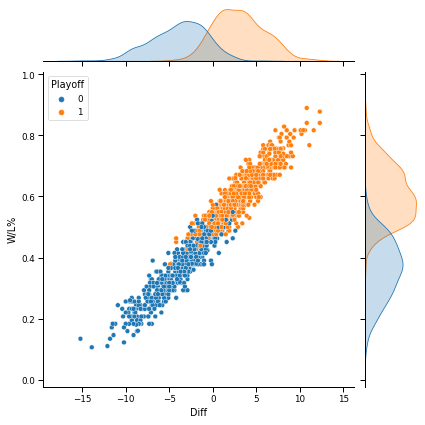

In [ ]:
sns.jointplot(total_data['Diff'],total_data['W/L%'],hue=total_data['Playoff'])

The same plot as above except for Champions

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


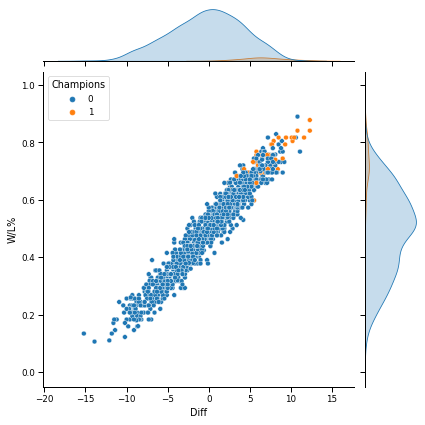

In [ ]:
sns.jointplot(total_data['Diff'],total_data['W/L%'],hue=total_data['Champions'])

The above plots look as expected. There is a strong correlation of points scored minus points allowed per game and winning percentage. Teams that went to the playoffs and won the champion ship tended to have high win percentages and high Diff scores (they scored more than they allowed). Makes sense!

Creating the variables to find the principle components

In [ ]:
variables = ['W/L%','Diff']
X = total_data[variables]
y = total_data['Playoff']

Standardizing, then running the PCA

In [ ]:
scaler = StandardScaler()
X_array = scaler.fit_transform(X)
X2 = pd.DataFrame(X_array,columns=X.columns)

pca = PCA()
x_pca = pca.fit_transform(X2)

In [ ]:
pca.explained_variance_ratio_

array([0.98410355, 0.01589645])

It explains a lot of variance! As we would expect

Let's now do the first fun thing. Let's take the current season and see how each team's principle component found from the above model changes as a function of the number of games

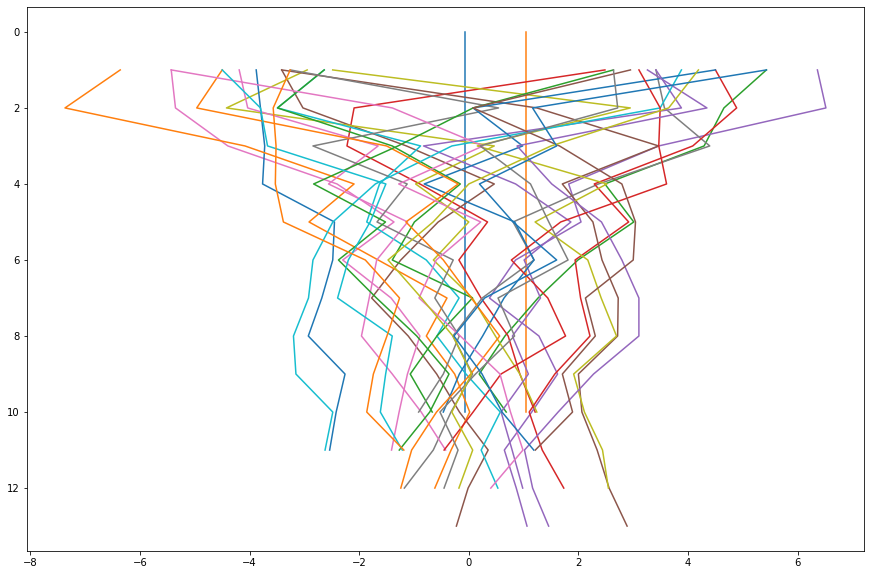

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().invert_yaxis()
plt.plot([-0.06223215,-0.06223215],[0,10]) 
plt.plot([1.04241077,1.04241077],[0,10])

for i in np.arange(0,len(nba_teams_index)): #first go through teams

  temp_score = nba_scores[nba_scores.columns[nba_teams_index[i]-1]]
  temp_oppscore = nba_scores[nba_scores.columns[nba_teams_index[i]]]

  temp_pca_values = []
  
  for j in np.arange(0,sum(nba_scores[nba_scores.columns[nba_teams_index[i]-1]] > 0)): #first go through each game

    win_perc = np.average((temp_score[0:j+1]-temp_oppscore[0:j+1])>0)
    ps_g = np.average(temp_score[0:j+1])
    ps_a = np.average(temp_oppscore[0:j+1])
    diff_scored = ps_g-ps_a

    temp_X_array = scaler.transform([[win_perc,diff_scored]])

    pca_values = pca.transform(temp_X_array)*-1

    temp_pca_values.append(pca_values[0,0])
    #print(pca_values)

  plt.plot(np.transpose(temp_pca_values),np.arange(0,len(temp_pca_values))+1)
    # now, nee

Over time, they should roughly converge to something closer to 0. There will be a lot of variance at the start. The best teams should be + in this graph

Below, let's look at this per team, which would be easier to interpret

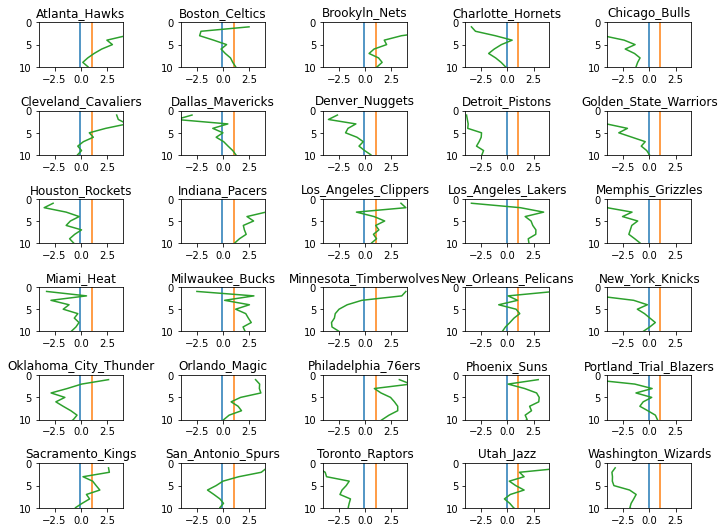

In [ ]:
current_score = []

fig,axes = plt.subplots(figsize=(10,7.5),nrows=6,ncols=5)


the_row = -1
for i in np.arange(0,len(nba_teams_index)): #first go through teams

  if i%5 ==0:
    the_row = the_row + 1

  axes[the_row,i%5].plot([-0.06223215,-0.06223215],[0,10])
  axes[the_row,i%5].plot([1.04241077,1.04241077],[0,10])
  axes[the_row,i%5].set_title(nba_teams[i])
  axes[the_row,i%5].axis([-4, 4, 0, 10])
  axes[the_row,i%5].invert_yaxis()

  temp_score = nba_scores[nba_scores.columns[nba_teams_index[i]-1]]
  temp_oppscore = nba_scores[nba_scores.columns[nba_teams_index[i]]]

  temp_pca_values = []
  
  for j in np.arange(0,sum(nba_scores[nba_scores.columns[nba_teams_index[i]-1]] > 0)): #first go through each game

    win_perc = np.average((temp_score[0:j+1]-temp_oppscore[0:j+1])>0)
    ps_g = np.average(temp_score[0:j+1])
    ps_a = np.average(temp_oppscore[0:j+1])
    diff_scored = ps_g-ps_a

    temp_X_array = scaler.transform([[win_perc,diff_scored]])

    pca_values = pca.transform(temp_X_array)*-1

    temp_pca_values.append(pca_values[0,0])
    #print(pca_values)

  axes[the_row,i%5].plot(np.transpose(temp_pca_values),np.arange(0,len(temp_pca_values))+1)

  current_score.append(temp_pca_values[-1])

    # now, nee

plt.tight_layout()

Let's just make a dataframe with the final scores and the team names. That way, we cna just easily see the scores

In [ ]:
nba_now_table = pd.DataFrame(nba_teams,columns=['Team'])
nba_now_table.insert(1,'Value',current_score)

In [ ]:
nba_now_table.sort_values(by=['Value'],ascending=0)

,Team,Value
13,Los_Angeles_Lakers,2.887440
16,Milwaukee_Bucks,2.545972
11,Indiana_Pacers,1.732009
22,Philadelphia_76ers,1.455862
6,Dallas_Mavericks,1.240672
23,Phoenix_Suns,1.212687
1,Boston_Celtics,1.210226
28,Utah_Jazz,1.184498
2,Brookyln_Nets,1.061433
12,Los_Angeles_Clippers,0.982645


In [ ]:
x_pca[:,0] = x_pca[:,0]*-1 # need to do this to flip the component so + is better.

Below, we can see the component value grouped by whether that team made the playoff

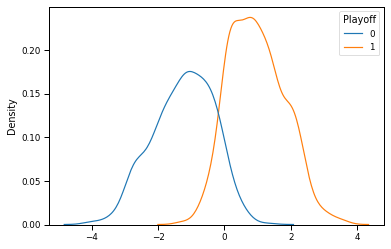

In [ ]:
sns.kdeplot(x=x_pca[:,0],hue=total_data['Playoff'])

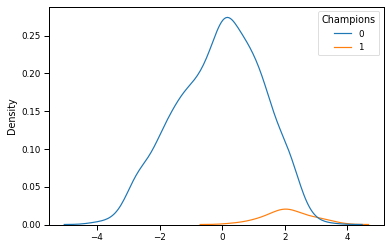

In [ ]:
sns.kdeplot(x=x_pca[:,0],hue=total_data['Champions'])

To find the component value that predicts whether a team made the playoffs or was a champion, I picked the threshold that maximized the true positive rate and minimized the false positive rate

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


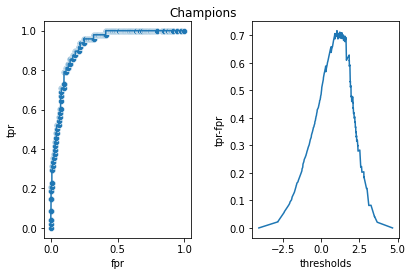

In [ ]:
fpr_champ, tpr_champ, thresholds_champ = metrics.roc_curve(total_data['Champions'],x_pca[:,0])

plt.suptitle('Champions')
plt.subplot(1,2,1)
plt.plot(fpr_champ,tpr_champ)
sns.scatterplot(fpr_champ,tpr_champ)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.subplot(1,2,2)
plt.plot(thresholds_champ,tpr_champ-fpr_champ)
plt.ylabel('tpr-fpr')
plt.xlabel('thresholds')
diff_champ = tpr_champ-fpr_champ
thresholds_champ[max(diff_champ)==diff_champ]
plt.tight_layout(pad=2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


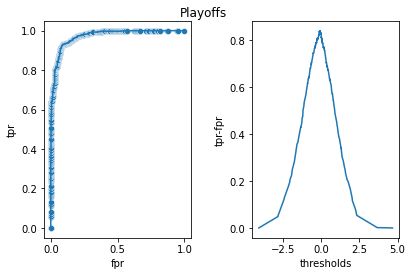

In [ ]:
fpr_play, tpr_play, thresholds_play = metrics.roc_curve(total_data['Playoff'],x_pca[:,0])

plt.suptitle('Playoffs')
plt.subplot(1,2,1)
plt.plot(fpr_play,tpr_play)
sns.scatterplot(fpr_play,tpr_play)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.subplot(1,2,2)
plt.ylabel('tpr-fpr')
plt.xlabel('thresholds')
plt.plot(thresholds_play,tpr_play-fpr_play)
diff_play = tpr_play-fpr_play
thresholds_play[max(diff_play)==diff_play]
plt.tight_layout(pad=2)

Here are just some tests looking at this components predictive ability

In [ ]:
kfold = model_selection.KFold(n_splits=10) # don't need to a random_state here because there is no shuffling
model = LogisticRegression()
results = model_selection.cross_val_score(model,x_pca[:,0].reshape(-1, 1), total_data['Champions'], cv=kfold)
print(results)
print(results.mean(), results.std())

[0.96031746 0.97619048 0.96031746 0.96825397 0.94444444 0.96031746
 0.96031746 0.976      0.984      0.96      ]
0.9650158730158729 0.01073800783643262


In [ ]:
kfold = model_selection.KFold(n_splits=10) # don't need to a random_state here because there is no shuffling
model = LogisticRegression()
results = model_selection.cross_val_score(model,total_data[['Diff']], total_data['Champions'], cv=kfold)
print(results)
print(results.mean(), results.std())

[0.96031746 0.97619048 0.96031746 0.96825397 0.94444444 0.96031746
 0.96031746 0.976      0.984      0.96      ]
0.9650158730158729 0.01073800783643262


Playing around with SVMs

In [ ]:
classifier1 = svm.LinearSVC(random_state=1)
classifier1.fit(total_data[['Diff']],total_data['Champions'])
classifier2 = svm.LinearSVC(random_state=1)
classifier2.fit(total_data[['W/L%']],total_data['Champions'])
classifier3 = svm.LinearSVC(random_state=1)
classifier3.fit(total_data[['SRS']],total_data['Champions'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

This method isn't so bad at determining which teams will be champion. The below plots are precision_recall curves because of the imbalance in the data

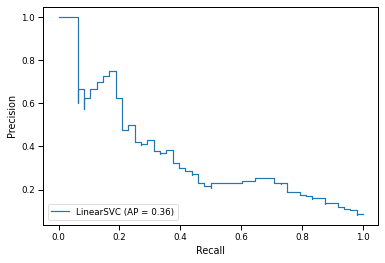

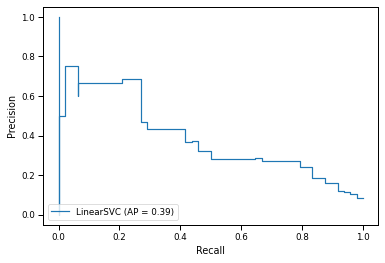

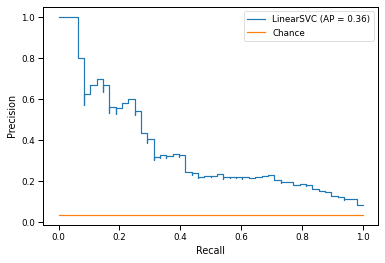

In [ ]:
plot_precision_recall_curve(classifier1, total_data[['Diff']],total_data['Champions'])
plot_precision_recall_curve(classifier2, total_data[['W/L%']],total_data['Champions'])
plot_precision_recall_curve(classifier3, total_data[['SRS']],total_data['Champions'])

plt.plot([0,1],[np.mean(total_data['Champions']),np.mean(total_data['Champions'])],label='Chance')
plt.legend()

Making a regression line

In [ ]:
model = LinearRegression()
model.fit(total_data[['Diff']],total_data['W/L%'])
ymodel = model.predict(total_data[['Diff']])

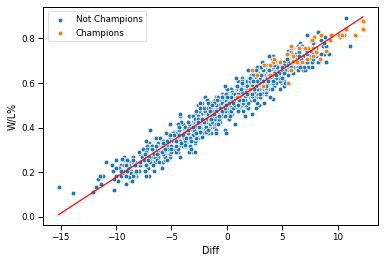

In [ ]:
sns.scatterplot(total_data['Diff'],total_data['W/L%'],label='Not Champions')
sns.scatterplot(total_data[total_data['Champions']==1]['Diff'],total_data[total_data['Champions']==1]['W/L%'],label='Champions')
sns.lineplot(total_data['Diff'],ymodel,color='r')

To see which teams over or underachieved, we can look at the residuals

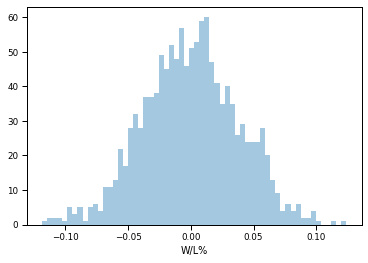

In [ ]:
sns.distplot(total_data['W/L%']-ymodel,60,kde=False)

Adding some columns to the dataframe

In [ ]:
residuals = total_data['W/L%']-ymodel
total_data.index = residuals.index
total_data.insert(len(total_data.columns),'Residuals2',residuals)
total_data.insert(len(total_data.columns),'P-W/L%',ymodel)
total_data.insert(len(total_data.columns),'P-W',ymodel*(total_data['W']+total_data['L']))

Lets pick the teams that are outside this range

In [ ]:
np.percentile(total_data['Residuals2'],[.5,99.5])

array([-0.10268227,  0.09600996])

In [ ]:
total_data[total_data['Residuals2'] < -.10268227] # underachievers

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Diff,Champions,Residuals2,P-W/L%,P-W
12,Dallas Mavericks,24,58,0.293,41.0,102.3,105.4,-2.70,2018,-3.1,0,-0.107036,0.400036,32.802922
3,Philadelphia 76ers*,35,31,0.530,4.0,93.6,89.4,3.59,2012,4.2,0,-0.105348,0.635348,41.932990
8,Houston Rockets,32,50,0.390,15.0,107.4,107.6,-0.34,1974,-0.2,0,-0.103516,0.493516,40.468314
4,Chicago Bulls,24,58,0.293,14.0,95.9,98.8,-2.89,1976,-2.9,0,-0.113483,0.406483,33.331570
12,Phoenix Suns,34,48,0.415,19.0,104.9,104.2,0.64,1977,0.7,0,-0.107527,0.522527,42.847229
3,Milwaukee Bucks,38,44,0.463,10.0,114.1,111.8,2.12,1979,2.3,0,-0.111103,0.574103,47.076410
12,Seattle SuperSonics,31,51,0.378,31.0,104.4,104.5,-0.47,1986,-0.1,0,-0.118739,0.496739,40.732638


In [ ]:
total_data[total_data['Residuals2'] > 0.09600996] # overachievers

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Diff,Champions,Residuals2,P-W/L%,P-W
7,Golden State Warriors*,51,31,0.622,18.0,108.2,107.4,0.92,1972,0.8,0,0.096249,0.525751,43.111553
2,Boston Celtics*,44,38,0.537,6.0,104.5,106.5,-1.90,1977,-2.0,0,0.101506,0.435494,35.710484
11,Los Angeles Clippers,32,50,0.390,30.0,108.6,115.5,-6.83,1986,-6.9,0,0.112456,0.277544,22.758615
4,Miami Heat*,38,44,0.463,13.0,105.0,109.2,-3.94,1992,-4.2,0,0.098422,0.364578,29.895360
6,Dallas Mavericks,11,71,0.134,44.0,99.3,114.5,-14.68,1993,-15.2,0,0.124003,0.009997,0.819735
8,Phoenix Suns*,59,23,0.720,—,110.6,106.8,3.86,1995,3.8,0,0.097546,0.622454,51.041268
12,Charlotte Hornets*,54,28,0.659,15.0,98.9,97.0,2.13,1997,1.9,0,0.097791,0.561209,46.019115


getting individual games

In [ ]:
list1 = ['DAL/1993','PHO/1995','CHH/1997','MIA/1992','DEN/1991'] # overachievers
list2 = ['DAL/2018','BOS/2007','PHI/2012','MIN/2014','DET/1998'] # underachievers
above_0 = [] 
below_0 = []
for list_item in list2:
  #url = 'https://www.basketball-reference.com/teams/DAL/1993_games.html'
  url = 'https://www.basketball-reference.com/teams/' + list_item + '_games.html'
  data = pd.read_html(url)

  drop_rows = []
  for index,row in data[0].iterrows():
    try:
      float(row['Tm'])+1
    except:
      drop_rows.append(index)

  game_data = []

  game_data = data[0].drop(index=drop_rows)

  game_data['Tm'] = pd.to_numeric(game_data['Tm'])
  game_data['Opp'] = pd.to_numeric(game_data['Opp'])
  game_data['W'] = pd.to_numeric(game_data['W'])
  game_data['L'] = pd.to_numeric(game_data['L'])

  above_0.append(sum((game_data['Tm']-game_data['Opp'] > 0) & (game_data['Tm']-game_data['Opp'] <= 5)))
  below_0.append(sum((game_data['Tm']-game_data['Opp'] < 0) & (game_data['Tm']-game_data['Opp'] >= -5)))

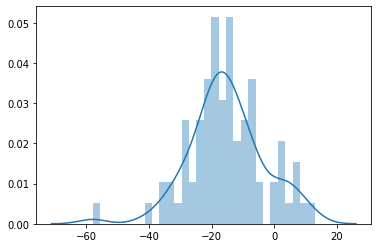

In [ ]:
sns.distplot(game_data['Tm']-game_data['Opp'],30)

In [ ]:
sum((game_data['Tm']-game_data['Opp'] > 0) & (game_data['Tm']-game_data['Opp'] <= 5))

6

In [ ]:
sum((game_data['Tm']-game_data['Opp'] < 0) & (game_data['Tm']-game_data['Opp'] >=-5))

3

In [ ]:
print(below_0) # list 1 # overachievers
print(above_0) # example - won 19 games by 5 or less points

[3, 4, 10, 13, 4]
[6, 19, 14, 12, 9]


In [ ]:
print(below_0) # list 2 # underachievers
print(above_0)

[19, 20, 10, 14, 19]
[5, 7, 5, 7, 10]


From this, we can conclude a few things. Mostly = wow, Dallas 1993 was awful and that Dallas 2018 lost a ton of really close games

E.g., which teams had a lot of very close games, which teams had good luck (won most of them), which teams had bad luck (lost most of them),